# Case study - favourable words from restaurant reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
business = pd.read_json('2_yelp_academic_dataset_business.json', lines=True)


In [3]:

business.shape

(15585, 15)

In [4]:
business.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15585 entries, 0 to 15584
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    15585 non-null  object 
 1   full_address   15585 non-null  object 
 2   hours          15585 non-null  object 
 3   open           15585 non-null  bool   
 4   categories     15585 non-null  object 
 5   city           15585 non-null  object 
 6   review_count   15585 non-null  int64  
 7   name           15585 non-null  object 
 8   neighborhoods  15585 non-null  object 
 9   longitude      15585 non-null  float64
 10  state          15585 non-null  object 
 11  stars          15585 non-null  float64
 12  latitude       15585 non-null  float64
 13  attributes     15585 non-null  object 
 14  type           15585 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 1.7+ MB


In [6]:
drop_cols = ['full_address', 'attributes', 'hours', 'open', 'latitude', 'longitude', 'name', 'neighborhoods']
business.drop(drop_cols, axis=1, inplace=True)

In [7]:

business.head()

,business_id,categories,city,review_count,state,stars,type
0,O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,AZ,4.0,business
1,QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,AZ,3.5,business
2,7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,AZ,3.5,business
3,gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,AZ,5.0,business
4,V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,3,AZ,5.0,business


Okay, so now we have a much more manageable (width) of data. Remember our first task is to identify the most popular type of restaurant. We now have our eye on the categories column. We could simply count each individual category in this column, just as we did with our pet owners survey. But our categories column isn't quite in the same format as that data. Each item in categories is actually a string, as we demonstrate below, with each item we're interested in separated by commas.

In [8]:

# print the first element of business['categories']
print(business.categories[0])

['Active Life', 'Arts & Entertainment', 'Stadiums & Arenas', 'Horse Racing']


In [9]:
# what is the type of this element?
type(business.categories[0])

list

In [10]:
# if the first element were a list, this would return 'Active Life', not 'A'
business.categories[0][0][0]

'A'

In [11]:
business.categories

0        [Active Life, Arts & Entertainment, Stadiums &...
1        [Tires, Automotive, Fashion, Shopping, Departm...
2        [Women's Clothing, Men's Clothing, Fashion, Sh...
3           [Pet Services, Pet Boarding/Pet Sitting, Pets]
4                                    [Veterinarians, Pets]
                               ...                        
15580                  [Sushi Bars, Japanese, Restaurants]
15581    [Active Life, Landmarks & Historical Buildings...
15582                           [Food, Convenience Stores]
15583                            [Shopping, Mobile Phones]
15584                               [Mexican, Restaurants]
Name: categories, Length: 15585, dtype: object

In [12]:
# task: count the frequency of each item in categories and keep the top twenty
# hint: the latter can be done by passing an argument to the head method
# assign the result to the variable category_counts - one line of code here:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

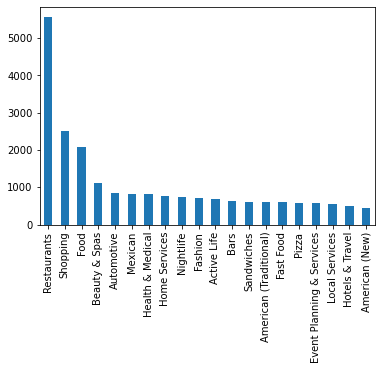

In [13]:
#Now we introduce you to a new kind of plot: a bar plot. This gives us a nice visual representation of the frequency of the top 20 categories.


category_counts.plot(kind='bar')

In [14]:
pd.isna(business['categories']).sum()

0

In [16]:
# hint, the opposite of pd.isna() is ~pd.isna()
# one line of code here, assigning the result back to business
business = business.loc[~pd.isna(business['categories'])]

In [17]:

business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [18]:

business.shape

(5556, 7)

In [19]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [20]:

restaurant_category_counts.head()

Restaurants               5556
Mexican                    822
Sandwiches                 609
American (Traditional)     607
Fast Food                  599
dtype: int64

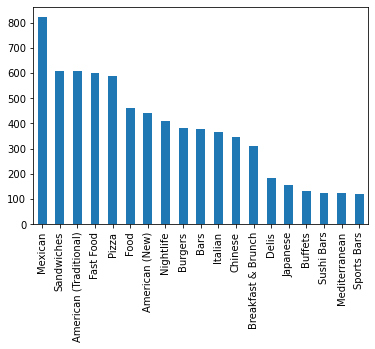

In [21]:

# 'Restaurants', of course, is our most frequent entry because, by definition, it is
# present in every case! Plot a bar chart now of the frequencies of the other values.
restaurant_category_counts[1:].plot(kind='bar')


We see we still have a few noise categories coming in, such as 'Food' and 'Nightlife'. But we can see that Pizza restaurants would seem to be a good bet for our marketing campaign trial! However, we also notice that Italian is pretty close behind, and using our domain knowledge, we figure that we'll use businesses that mention either Pizza or Italian.

# Save desired business ID to file

In [22]:
# task use a lambda function on the categories column again, but now you're not testing for
# 'Restaurant' but either 'Pizza or 'Italian'
# assign the result to italian_pizza (one line of code)
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza' in x) | ('Italian' in x)), :]

In [23]:

italian_pizza.head()

,business_id,categories,city,review_count,state,stars,type
68,_DZfwU9dE9Q5I1-1jiM1vQ,"[Bars, Pizza, Nightlife, Restaurants]",Scottsdale,8,AZ,4.0,business
116,vfzUNcV9B3RhDyuZp0I1pQ,"[Pizza, Restaurants]",Glendale,73,AZ,4.0,business
132,Xqh9wCLzlt7ChkrV9BdR2Q,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Mesa,4,AZ,2.0,business
133,Jje3kP5CNasYDSpH0NPRGQ,"[Restaurants, Pizza, Italian]",Avondale,31,AZ,4.0,business
159,tA2DT7CGQPzgA6tTcTkXDw,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",Scottsdale,33,AZ,4.0,business


In [24]:
# Check the shape of the DataFrame
italian_pizza.shape

(774, 7)

In [25]:
# task: use panda's to_csv DataFrame method to save the result to a file
# use the index argument to suppress saving the index
# use the columns argument to save only the business_id, review_count, stars, and state columns
# one line of code here
italian_pizza.to_csv('business_list.csv', columns=['business_id', 'review_count', 'stars', 'state'], index=False)